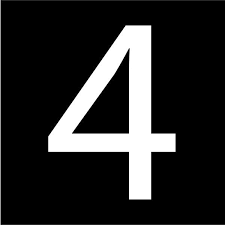

(225, 225)


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
image = cv2.imread('download1.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)
print(image.shape)

In [ ]:
def get_4_direction(prev_point, current_point):
    x_diff = current_point[0] - prev_point[0]
    y_diff = current_point[1] - prev_point[1]

    if x_diff > 0:
        return 0  # Positive x-direction
    elif y_diff > 0:
        return 1  # Positive y-direction
    elif x_diff < 0:
        return 2  # Negative x-direction
    elif y_diff < 0:
        return 3  # Negative y-direction
    else:
        return -1  # No movement

def generate_4_direction_chain(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to obtain a binary image (adjust the threshold as needed)
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming the largest contour represents the object of interest
    largest_contour = max(contours, key=cv2.contourArea)

    # Draw the contour on a copy of the original image
    result_image = image.copy()
    cv2.drawContours(result_image, [largest_contour], -1, (0, 255, 0), 2)

    # Save the result image
    cv2.imwrite('result_img_4d.png', result_image)

    # Extract chain code from the largest contour using the restricted movement function
    chain_code = []
    prev_point = largest_contour[0][0]
    for point in largest_contour[1:]:
        current_point = point[0]
        direction = get_4_direction(prev_point, current_point)
        if direction != -1:  # Ignore points with no movement
            chain_code.append(direction)
        prev_point = current_point

    return (chain_code,largest_contour)

In [ ]:
def get_8_direction(prev_point, current_point):
    x_diff = current_point[0] - prev_point[0]
    y_diff = current_point[1] - prev_point[1]

    if x_diff > 0:
        if y_diff > 0:
            return 1#######  # Diagonal movement: Positive x, Positive y
        elif y_diff < 0:
            return 7  # Diagonal movement: Positive x, Negative y (Anticlockwise)
        else:
            return 0########  # Horizontal movement: Positive x, No change in y
    elif x_diff < 0:
        if y_diff > 0:
            return 3#######  # Diagonal movement: Negative x, Positive y (Anticlockwise)
        elif y_diff < 0:
            return 5#######  # Diagonal movement: Negative x, Negative y (Anticlockwise)
        else:
            return 4########  # Horizontal movement: Negative x, No change in y
    else:
        if y_diff > 0:
            return 2#######  # Vertical movement: No change in x, Positive y
        elif y_diff < 0:
            return 6#######  # Vertical movement: No change in x, Negative y (Anticlockwise)
        else:
            return -1  # No movement


def generate_8_direction_chain(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to obtain a binary image (adjust the threshold as needed)
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming the largest contour represents the object of interest
    largest_contour = max(contours, key=cv2.contourArea)

    # Draw the contour on a copy of the original image
    result_image = image.copy()
    cv2.drawContours(result_image, [largest_contour], -1, (0, 255, 0), 2)

    # Save the result image
    cv2.imwrite('result_img_8d.png', result_image)

    # Extract chain code from the largest contour using the restricted movement function
    chain_code = []
    prev_point = largest_contour[0][0]
    for point in largest_contour[1:]:
        current_point = point[0]
        direction = get_8_direction(prev_point, current_point)
        if direction != -1:  # Ignore points with no movement
            chain_code.append(direction)
        prev_point = current_point

    return (chain_code,largest_contour)

In [ ]:
# Generate the 4-direction chain code for edge detection
(chain_4d,contour) = (generate_4_direction_chain(image_path))
'''np.uint8'''

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
print(np.uint8(chain_4d))

[1 0 3]


In [ ]:
#print(contour[0])
conter=[]
for i in range(len(contour)):
    conter.append(contour[i])

conter = [tuple(point[0]) for point in contour]
print(conter)

[(0, 0), (0, 254), (196, 254), (196, 0)]


In [ ]:
# Generate the 8-direction chain code for edge detection
chain_8d,contour_ = (generate_8_direction_chain(image_path))
print(chain_8d)

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
print(np.uint8(chain_8d))

[2 0 6]


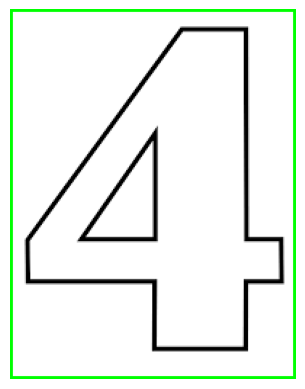

In [ ]:
a=cv2.imread('result_img_4d.png');
plt.imshow(a);
plt.axis('off');

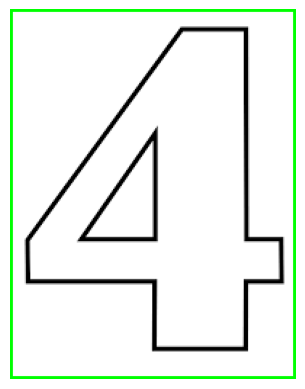

In [ ]:
b=cv2.imread('result_img_8d.png');
plt.imshow(b);
plt.axis('off');